# 5.1 비용함수(Cost Function) 정의 및 최소화

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime
import os

## 5.1.1 Hypothesis & Cost

### 선형회귀 가설(Hypothesis) 및 이때의 비용 함수 (Cost Function) 

> $ \mathbf{W} = (w_1, w_2, ..., w_p ) $

> $ \mathbf{x}^{(i)} = (x_{i1}, x_{i2}, ... , x_{ip} ) $

> $ \mathbf{y}^{(i)} = \mathbf{W}  \cdot \mathbf{x}^{(i)} + b + e^{(i)} = w_1 \times x_{i1} + ... + w_p \times x_{ip} + b + e^{(i)} $

Hypothesis : $ H(\mathbf{x}) = \mathbf{W}\mathbf{x} + b $

Cost : $ Cost(\mathbf{W}, \mathbf{b} ) = \frac{1}{m} \displaystyle\sum_{i=1}^{m} (e^{(i)})^2 = \frac{1}{m}  \displaystyle\sum_{i=1}^{m} ( H(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)} )^2 $



### 단순화: 상수항(intercept) x에 추가 

> $ w_0 = b,  x_{i0} = 1 $ 로 간주하면,  상수항( $ b $ ) 을 제거한 형태로 단순화됨. 

> $ \mathbf{W} = ( b, w_1, w_2, ..., w_p ) = ( w_0, w_1, w_2, ..., w_p ) $

> $ \mathbf{x}^{(i)} = (1, x_{i1}, x_{i2}, ... , x_{ip} ) = (x_{i0}, x_{i1}, x_{i2}, ... , x_{ip} ) $

Hypothesis : $ H(\mathbf{x}) = \mathbf{W}\mathbf{x} $

Cost : $ Cost(\mathbf{W}) = \frac{1}{m}  \displaystyle\sum_{i=1}^{m} ( H(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)} )^2 $

- Cost Function은 오차 제곱의 평균: 제곱 합계 (SS: Sum of Squares) 를 구한 후 사례 m건으로 나눠줌

- 이 Cost를 최소화하는 것이 과제

> $ \newcommand{\argmin}{\mathop{\mathrm{argmin}}\limits} \displaystyle\argmin_{ \mathbf{W} \in \{ (w_0, ..., w_p) | p + 1 dims\} } \frac{1}{m}  \displaystyle\sum_{i=1}^{m} ( \mathbf{W}\mathbf{x}^{(i)} - \mathbf{y}^{(i)} )^2 $

## 5.1.2 비용함수 최소화

### 비용함수 시각화

<img src="images/gd-00.png" alt="Drawing" style="width: 640px;"/>

- `기울기 == 0` 일때 가장 낮은 지점 (Global Minimum)일 가능성 높음 (최소한 Local Minimum)

- 기울기 방향으로 전진시킨다면? 

> - 즉 내려가는 방향이면 +해주고, 올라가는 방향이면 -해주는 식으로...
> - 급격하게 내려가면 (기울기가 가파르다면) 그 방향으로 급격하게 바뀔 것. 단, 아주 작은 범위로만 가야 할 것
> - 이 작은 값 $ \alpha = 0.01 ... 0.001 $ 

## 5.1.3 Gradient Descent (경사 하강)

비용함수 수정: $ Cost(\mathbf{W}) = \frac{1}{2m}  \displaystyle\sum_{i=1}^{m} ( \mathbf{W}\mathbf{x}^{(i)} - \mathbf{y}^{(i)} )^2 $

### 경사(Gradient)

$ \frac{\partial}{\partial \mathbf{W}} Cost(\mathbf{W}) = \frac{\partial}{\partial\mathbf{W}} \frac{1}{2m}  \displaystyle\sum_{i=1}^{m} ( \mathbf{W}\mathbf{x}^{(i)} - \mathbf{y}^{(i)} )^2 = \frac{1}{2m}  \displaystyle\sum_{i=1}^{m} 2 ( \mathbf{W}\mathbf{x}^{(i)} - \mathbf{y}^{(i)} ) \mathbf{x}^{(i)} = \frac{1}{m} \displaystyle\sum_{i=1}^{m} ( \mathbf{W}\mathbf{x}^{(i)} - \mathbf{y}^{(i)} ) \mathbf{x}^{(i)}  $

### GD 알고리즘: 가중치  (weight, W) 업데이트

$ \mathbf{W} := \mathbf{W} - \alpha \frac{\partial}{\partial \mathbf{W}} Cost(\mathbf{W}) $
$ = \mathbf{W} - \alpha \frac{1}{m} \displaystyle\sum_{i=1}^{m} ( \mathbf{W}\mathbf{x}^{(i)} - \mathbf{y}^{(i)} ) \mathbf{x}^{(i)} $

> Gradient 값이 0이 될 때, 즉 `W`가 일정한 값으로 수렴할때까지 반복 업데이트

### Learing Rate

- 낮은 Learning Rate: 수렴이 늦어질 수 있음. 단, 발산하지 않고, 최소한 Local Minima를 찾아낼 수 있음. Local Minima에 빠지기 쉬움

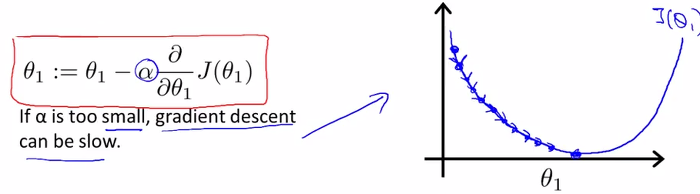

- 높은 Learning Rate: 수렴하지 않고 발산할 위험이 있음. 그러나 Local Minima에서 벗어날 가능성도 있음

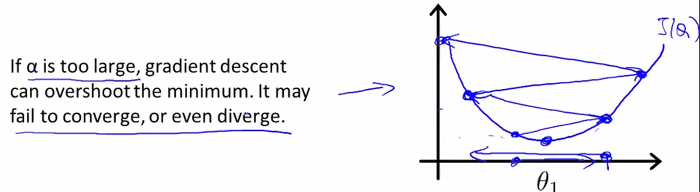

#### 이슈

- 학습데이터 건수(`m`)가 많을수록 느려짐 -> 전체 m 대신 일부만 사용 (SGD)

- `W`의 출발점 및 Cost Function 유형에 따라, 실제 최소값이 아닌 Local Minima로 수렴할 수 있음
> 선형회귀 이외 다른 모델 최적화에서는 다른 알고리즘을 사용할 때가 많음

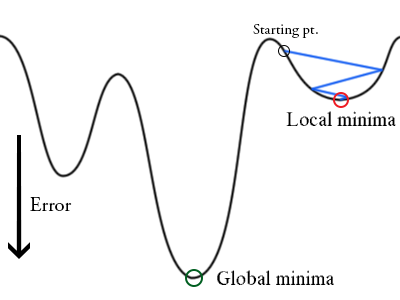

### Stochastic Gradient Descent

- 전체 $ \mathbf{x}, \mathbf{y} $ 대신 일부 (minibatch) 만 택함. 

- Sampling때문에 통계적(`Stochastic`) GD가 됨

- 훨씬 고속으로 GD와 유사한 최적화 가능


#### GD 응용

- GD (전체 학습 데이터 대상 - minibatch), SGD (일부 학습 데이터 대상 - minibatch) 아이디어는 각종 유사한 최적화에서 사용됨
> 본 문제처럼 최소값을 구하는 형태이면 Descent (기울기 방향 -), 최대값을 구한다면 Ascent (기울기 방향 +)


# 5.2 Logistic (Regression) Classification

## 5.2.1 분류 가설 (Hypothesis)

### (Binary) Classification

- 속한다=1, 속하지 않는다=0 - 즉, 0 또는 1로 부호화(encoding)
> - 예1: 스팸=1, 스팸메일 아님=0
> - 예2: 추천=1, 비추천=0
> - 예3: 비정상거래=1, 정상거래=0

### Sigmoid Function

- 0에 가까운 값에서 출발, 특정 범위에서 급격히 증가, 1에 가까운 값이 됨

- 실제 분류에 사용하려면, 특정 threshold 값 이상이 되면 1이라고 정해줘야 함 

$ g(z) = \frac{1}{1 + e^{-z}} $

### Logistic Hyphothesis

$ \mathbf{z} = \mathbf{W} \mathbf{x} $

$ H(\mathbf{x}) = g(\mathbf{z}) =  \frac{1}{1 + e^{- \mathbf{W} \mathbf{x}}} $

### Sigmoid Visualization

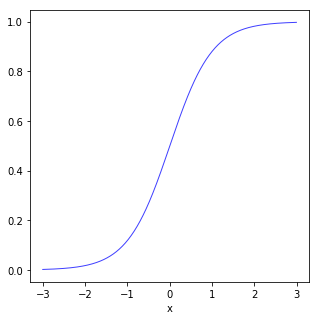

In [2]:
from math import exp
list_x = [x / 100.0 for x in range(-300, 300)]
list_y = [1 / (1 + exp(- 2.0 * x)) for x in list_x]

# Plot predictions
plt.figure(figsize=(5,5)) # 그래프 크기 지정
plt.plot(list_x, list_y, color='blue', alpha=0.75, linewidth=1)
plt.xlabel("x")
plt.show()

## 5.2.2 Cost Function

### 수식

$ Cost(\mathbf{W}) = \frac{1}{m} \displaystyle\sum_{i=1}^{m} c (H( \mathbf{x}^{(i)} ), \mathbf{y}^{(i)}) $

이때 $ c (H( \mathbf{x} ), \mathbf{y}) =
\begin{cases}
    - log(H( \mathbf{x} ))       & \quad \text{if } \mathbf{y} = 1 \\
    - log(1-H( \mathbf{x} ))  & \quad \text{if } \mathbf{y} = 0 \\
\end{cases} \\
= - \mathbf{y} log (H(\mathbf{x})) - (1 - \mathbf{y}) log (1 - H(\mathbf{x})) $

$ Cost(\mathbf{W}) = - \frac{1}{m} \displaystyle\sum_{i=1}^{m} \mathbf{y} log (H(\mathbf{x})) + (1 - \mathbf{y}) log (1 - H(\mathbf{x})) $


#### 기존 전력량 예제 활용, Logistic Regression 예제 만들기

- 현재 기상정보 --> 전력 고사용 여부 식별 (평균 + 2 * 표준편차 이상)

- 학습/테스트 데이터 전처리

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime
import os

In [4]:
frame_train = pd.read_csv('../hkseo/data/power-env-avg-dd-2015.csv', index_col='tm').loc[:, ['watts', 'cool_dd', 'heat_dd', 'dewPoint', 'pressure', 'humidity',  'windSpeed']].dropna(how='any')
frame_test = pd.read_csv('../hkseo/data/power-env-avg-dd-2016.csv', index_col='tm').loc[:, ['watts', 'cool_dd', 'heat_dd', 'dewPoint', 'pressure', 'humidity',  'windSpeed']].dropna(how='any')

frame_all = frame_train.append(frame_test)
scaling_min = frame_all.min()[1:]
scaling_max = frame_all.max()[1:]

# 0 ... 1 사이가 되도록 조정 (장철훈 책임 코드 수정)
def MinMaxScaler(data):
    # 참고: http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    numerator = data - scaling_min
    denominator = scaling_max - scaling_min
    return numerator / (denominator + 1e-7)

- 학습데이터 가공, 고사용(`high_usage`) 라벨 추가

In [5]:
raw_x = MinMaxScaler(frame_train.iloc[:, 1:]) 
raw_watts = frame_train.watts
high_usage = raw_watts.mean() + 2 * raw_watts.std() 
print('- Criteria for high usage: %.2f' % high_usage) # 평균에서 2 * (표준편차) 값을 고사용 기준으로 봤음

highly_used = raw_watts > high_usage
raw_y = pd.DataFrame({'high_usage':highly_used}, index=raw_x.index)
num_high_usage = len(raw_y[raw_y.high_usage])
print('- num_high_usage: %d, num_total: %d, ratio: %.2f' % (num_high_usage, len(raw_y), num_high_usage * 100.0 / len(raw_y)))

- Criteria for high usage: 2.83
- num_high_usage: 303, num_total: 8757, ratio: 3.46


- 테스트 데이터 가공, 고사용(high_usage) 라벨 추가

In [6]:
raw_x_test =MinMaxScaler(frame_test.iloc[:, 1:])
raw_y_test = pd.DataFrame({'high_usage':(frame_test.watts > high_usage)}, index=raw_x_test.index)
print(len(raw_y_test[raw_y_test.high_usage]), len(raw_y_test))

92 8710


In [7]:
model_ckpt_path = '../hkseo/data/model_checkpoint.ckpt'
input_dim = len(raw_x.columns) ; output_dim=1
learning_rate = 0.01
iterations = 10000

x_dataset = raw_x.as_matrix()
y_dataset = raw_y.as_matrix() * 1 # True/False -> 1/0 으로 변경

X = tf.placeholder(tf.float32, [None, input_dim], name='input_x')
Y = tf.placeholder(tf.float32, [None, output_dim], name='input_y')

W = tf.Variable(tf.random_uniform([input_dim, 1], -1.0, 1.0), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

cost = -tf.reduce_sum(Y * tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis))
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(cost)
saver = tf.train.Saver()

sess = tf.Session()
sess.run(tf.global_variables_initializer())

if os.path.isfile(model_ckpt_path):
    # Restore variables from disk.
    saver.restore(sess, model_ckpt_path)
    print ("restored ", model_ckpt_path)
else:
    print ("not found ", model_ckpt_path)
    
# Training step
previous_loss = 0
for i in range(iterations):
    _, step_loss = sess.run([train, cost], feed_dict={X: x_dataset, Y: y_dataset})
    if i % 500 == 0:
        print(datetime.datetime.now(), " [step: {}] loss: {}".format(i, step_loss))
        # Save the variables to disk.
        saver.save(sess, model_ckpt_path)
    diff_loss = step_loss if previous_loss is 0 else (step_loss - previous_loss)
    previous_loss = step_loss
    if abs(diff_loss) < 0.001 : # 이전 iteration의 cost와 차이가 주어진 값 미만으로 떨어지면, `early exit` 가능하도록 하는 게 좋음
        print(datetime.datetime.now(), " [step: {}] loss: {}, early exit!".format(i, step_loss))
        break

saver.save(sess, model_ckpt_path)

not found  ../hkseo/data/model_checkpoint.ckpt
2017-07-14 17:16:50.484805  [step: 0] loss: 10351.34375
2017-07-14 17:16:51.897254  [step: 500] loss: 1147.7484130859375
2017-07-14 17:16:53.237495  [step: 1000] loss: 872.3045654296875
2017-07-14 17:16:54.571706  [step: 1500] loss: 735.1699829101562
2017-07-14 17:16:55.880477  [step: 2000] loss: 664.5286865234375
2017-07-14 17:16:57.640919  [step: 2500] loss: 624.2958984375
2017-07-14 17:16:58.966225  [step: 3000] loss: 599.62109375
2017-07-14 17:17:00.283528  [step: 3500] loss: 583.7578125
2017-07-14 17:17:01.566962  [step: 4000] loss: 573.28076171875
2017-07-14 17:17:02.930076  [step: 4500] loss: 566.2618408203125
2017-07-14 17:17:04.313994  [step: 5000] loss: 561.4963989257812
2017-07-14 17:17:05.651358  [step: 5500] loss: 558.1693725585938
2017-07-14 17:17:06.962651  [step: 6000] loss: 555.7168579101562
2017-07-14 17:17:08.198722  [step: 6500] loss: 553.7818603515625
2017-07-14 17:17:09.536924  [step: 7000] loss: 552.1828002929688
201

'../hkseo/data/model_checkpoint.ckpt'

### 2016년 예측결과 : Sigmoid 값

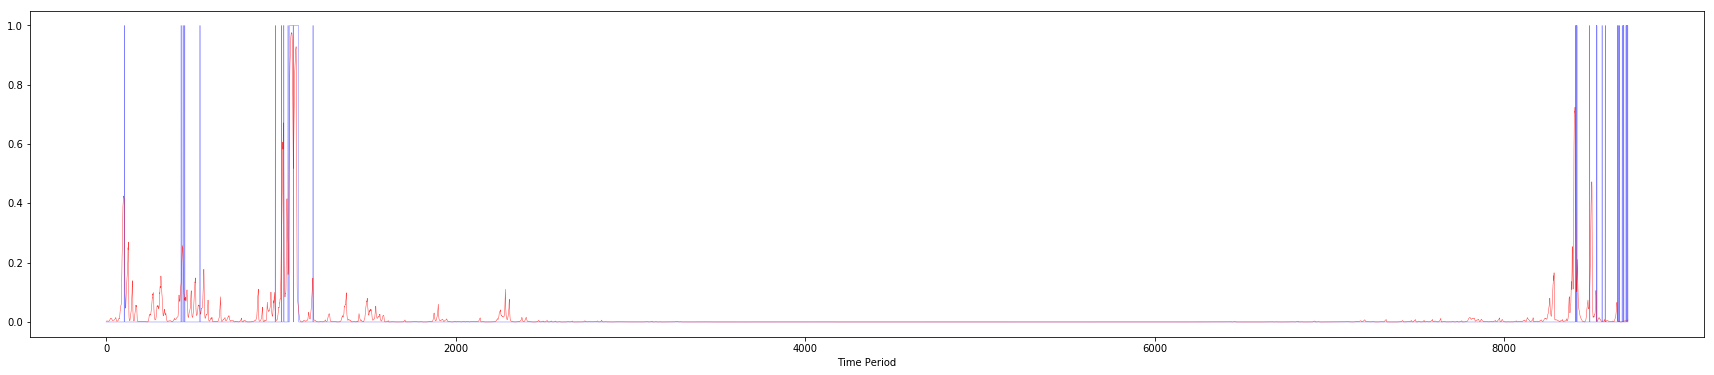

In [8]:
x_dataset_test = raw_x_test.as_matrix()
y_dataset_test = raw_y_test.as_matrix() 

Y_predict =  tf.sigmoid(tf.matmul(X, W) + b)

# test step
test_predict = sess.run(Y_predict, feed_dict={X: x_dataset_test})

# Plot predictions
plt.figure(figsize=(30,6)) # 그래프 크기 지정
plt.plot(y_dataset_test, color='blue', alpha=0.5, linewidth=0.5)
plt.plot(test_predict, color='red', alpha=0.75, linewidth=0.5)
plt.xlabel("Time Period")
plt.show()

### 2016년 예측결과 : Sigmoid(x) >= threshold

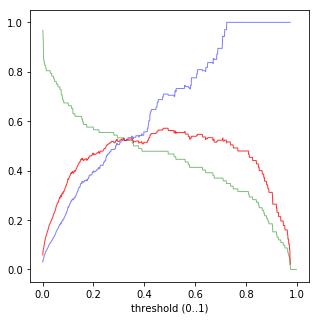

In [9]:
criteria_list = list()
prs = list()
rcs = list()
f1s = list()
fprs = list()

num_t = len(y_dataset_test[y_dataset_test])
num_n = len(y_dataset_test) - num_t

for criteria in range(1, 1000):
    predicted = test_predict >= criteria / 1000.0
    num_predicted = len(predicted[predicted])
    num_tp = len(predicted[predicted & y_dataset_test])
    
    pr = num_tp / float(num_predicted) if num_predicted else np.nan
    rc = num_tp / float(num_t)
    f1 = 2 * pr * rc / (pr + rc)
    num_fp = len((predicted[predicted & ~y_dataset_test]))
    fpr = num_fp / float(num_n)
    prs.append(pr)
    rcs.append(rc)
    f1s.append(f1)
    fprs.append(fpr)
    criteria_list.append(criteria / 1000.0)
    #print('P: %d, T: %d, TP: %d, p: %.4f, r: %.4f, F1: %.4f' % (num_predicted, num_answers, num_tp, pr, rc, f1))
    
fr_measured = pd.DataFrame({'precision':prs, 'recall':rcs, 'f1':f1s, 'fpr':fprs}, index=criteria_list)


plt.figure(figsize=(5,5)) # 그래프 크기 지정
plt.plot(fr_measured.precision, color='blue', alpha=0.5, linewidth=1)
plt.plot(fr_measured.recall, color='green', alpha=0.5, linewidth=1)
plt.plot(fr_measured.f1, color='red', alpha=0.8, linewidth=1)
plt.xlabel("threshold (0..1)")
plt.show()


#### ROC (Receiver Operation Characteristic) Curve 

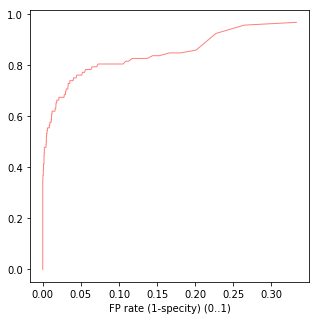

In [10]:
fr_roc = fr_measured.loc[:, ['fpr', 'recall']].dropna(how='any')
plt.figure(figsize=(5,5)) # 그래프 크기 지정
plt.plot(fr_roc.fpr, fr_roc.recall, color='red', alpha=0.5, linewidth=1)
plt.xlabel("FP rate (1-specity) (0..1)")
plt.show()

# 5.3 Multinomial Classification & SoftMax 

# 5.4 Learning Rate / Data Preprocessing / Overfitting